
Бусько Полина  
polina_petrova_02@bk.ru

---

__Предмет__: Теория и Практика Численных Методов  


# Лабораторная работа №4.   

## Решение нелинейных ОДУ методом конечных элементов 

__Due date:__ 2023.11.23 .  
__Date submitted:__ 2023.12.07




## Задание.  

Решить нелинейное уравнение методом конечных элементов второго порядка: 

$$ 
-\frac{d}{dx}\left( p(x, u) \frac{du}{dx} \right) + q(x, u) \cdot \frac{du}{dx} + r(x, u) \cdot u = f(x, u), 
\qquad
x \in (1/4, 4).
$$

Коэффициенты и источниковый член уравнения имеют вид:

$$
  p(x, u) = (1 + u), \quad  q(x) = 0,  \quad r(x) = 0, \quad  
  f(x) = - \frac{1}{4 u^3}.
$$

Точное решение:

$$
u(x) = \sqrt{x}
$$

1. (4 балла) Пояснить в отчете схему применения метода конечных элементов второго порядка. 
2. (8 баллов) Используя программы из предыдущих работ в качестве шаблона, реализовать решение задачи в двух вариантах: c использованием базисных функций первого и второго порядка.
   * Использовать любой стандартный способ решения получившейся после аппроксимации системы нелинейных уравнений (например SciPy.optimize)
4. *(4 балла) Дополнить программу самостоятельной реализацией алгоритма метода Ньютона для решения нелинейной системы.
5. (4 балла) Сравнить точное и приближенное решения, провести исследование зависимости погрешности от качества сетки.
 
   
   

## Решение

### Задание 1
#### Сетка

Рассматрим интервал, на котором определено уравнение: $x \in (\frac14; 4)$. Так как мы используем квадратичные базисные функции, то каждый элемент будет задействовать на один узел сетки больше, то есть каждому эдементу соответсвует 3 узла сетки. Всего таких дополнительных узлов будет $N$, значит нвоое количество всех узлов $= 2N + 1$, причем $x_1 = a,\quad x_{2N+1} = b$ (в нашем случае $a = \frac14,\quad b = 4$).

Таким образом, элемент $k$ занимает интервал $x_{2k}<x<x_{2k+2}, k=1,2,...,N$. Еще одно условие: элемент $x_{2k+1}$ располагается в центре элемента $k$, то есть $x_{2k+1} = \frac12\cdot(x_{2k} + x_{2k+2})$
![рисунок 1](pictures_lab_4/pic_1.png)

Глобальные квадратичные базисные фукнции будем задавать через локальные базисные функции, определенные на каноническом элементе $0<X<1$
![рисунок 2](pictures_lab_4/pic_2.png)

$$
\varphi_{loc, 1}(X) = 2(1 - X)(\frac12 - X)\\
\varphi_{loc, 2}(X) = 4X(1 - X)\\
\varphi_{loc, 3}(X) = 2X(X - \frac12)
$$

Формула преобразования для элемента номер $k$:$\quad$ $x = X_{2k} + (X_{2k+2} - X_{2k})X$

Глобальные базисные функции на элементе с номером $k$ определяются следуюзим образом:

$$
\varphi_{2k}(X) = \varphi_{loc, 1} (X)\\
\varphi_{2k + 1}(X) = \varphi_{loc, 2} (X)\\
\varphi_{2k + 2}(X) = \varphi_{loc, 3} (X)
$$

Сделав замену в формуле преобразования локальные базисные функции можно записать через исходную переменную $x$. Тогда глобальные базисные функции примут вид:

$$
\varphi_{2k}(x) = \frac{(x_{2k+1}-x)(x_{2k+2}-x)}{(x_{2k+1}-x_{2k})(x_{2k+2}-x_{2k})},\\
\varphi_{2k+1}(x) = \frac{(x-x_{2k})(x_{2k+2}-x)}{(x_{2k+1}-x_{2k})(x_{2k+2}-x_{2k+1})},\\
\varphi_{2k+2}(x) = \frac{(x-x_{2k+2})(x-x_{2k+1})}{(x_{2k+2}-x_{2k+2})(x_{2k+2}-x_{2k+1})},\\
\varphi_{j}(x) = 0, \quad j\ne 2k, j\ne 2k+1, j \ne 2k+2
$$

#### Сборка
Решение данной задачи будем искать в виде: $U = \sum_{j=1}^{2N+1}u_j\varphi_j$
Так как данная задача является нелинейной, то записать линйную систему вида: $AU=b$ не получится.
Запишим в нелинейном виде: $R(U)=0$, где $R$ - невязка.

$$
R_i(U) = \displaystyle\int\limits_{a}^{b}\big[p\big(x,U,\frac{dU}{dx}\big)\frac{d\varphi_i}{dx}+r\big(x,u,\frac{dU}{dx}\big)\varphi_i\big]dx - \alpha U(b)\varphi_i(b)+p_b\varphi_i(b) = 0
$$

Получаем систему нелинейных уравнений.

Причем, последнее слагаемое в этом уравнении не равно нуляю только в последней строке, т.е. $\alpha U(b)\varphi_i(b)+p_b\varphi_i(b) = 0 \quad \forall \quad i=1,...,2(N-1)$

$$
R_i(U) = \sum_{k=0}^{N-1}\displaystyle\int\limits_{x_{2k}}^{x_{2k+2}}\big[p(x,U, \frac{dU}{dx})\frac{\varphi_i}{dx}+r\varphi_i\big]dx, \quad i=1,...,2N-2
$$

В локальных координатах:

$$
R_{loc, 0}^k(U) = h\displaystyle\int\limits_{\frac14}^{4}\big[\frac1hp\frac{d\varphi_{loc, 0}(X)}{dX}+r\varphi_{loc, 0}\big]dX\\
R_{loc, 1}^k(U) = h\displaystyle\int\limits_{\frac14}^{4}\big[\frac1hp\frac{d\varphi_{loc, 1}(X)}{dX}+r\varphi_{loc, 1}\big]dX\\
R_{loc, 2}^k(U) = h\displaystyle\int\limits_{\frac14}^{4}\big[\frac1hp\frac{d\varphi_{loc, 2}(X)}{dX}+r\varphi_{loc, 2}\big]dX
$$

После вычисления этих интегралов их нужно добавить к значениям с соответсвующими индексами:

$$
R_{2k}=R_{2k}+R_{loc, 0}^{(k)}\\
R_{2k+1}=R_{2k+1}+R_{loc, 1}^{(k)}\\
R_{2k+2}=R_{2k+2}+R_{loc,2}^{(k)}
$$

### Задание 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

In [5]:
def defineFuncP(u):
    return (1 + u)

def defineFuncF (u):
    return (-1/(4 * u * u *u))

In [72]:
def loc(x, U, k):
    
    h = x[k + 1] - x[k]
    R_loc = np.zeros(2)
    
    M = 3
    GaussQWeight = [5/18, 4/9, 5/18]
    GaussQPoint = [1/2 * (1 - math.sqrt(3/5)), 1/2, 1/2 * (1 + math.sqrt(3/5))]
    
    for m in range(M):
        X = GaussQPoint[m]
        phi_loc = [1 - X, X]
        phi_locPr = [-1, 1]
            
        u_loc = U[k] * phi_loc[0] + U[k + 1] * phi_loc[1]
        u_locPr = U[k] * phi_locPr[0] + U[k + 1] * phi_locPr[1]
            
        valueP = defineFuncP(u_loc)
        valueF = defineFuncF(u_loc)
        
        for i in range (2):
            R_loc[i] = R_loc[i] + (h * GaussQWeight[m] * (1 / (h * h) * valueP * u_locPr * phi_locPr[i] + valueF * phi_loc[i]))
    return R_loc

In [73]:
def glob(x, U):
    N = len(x) - 1
    R = np.zeros(N + 1)
    for k in range(0, N):
        r_loc = loc(x, U, k)
        R[k:k+2] += r_loc

    R[0] = U[0] - 1/2
    R[N] = R[N] - 3/4
    return R

In [74]:
N = 50
x = np.linspace(1/4, 4, N)
U0 = np.zeros(len(x)) + 1

In [75]:
R = lambda U: glob(x, U)
res = scipy.optimize.root(R, U0)
res

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00  3.328e-07 ... -3.410e-07  2.502e-07]
       x: [ 5.000e-01  5.715e-01 ...  1.981e+00  2.000e+00]
    nfev: 62
    fjac: [[-3.825e-02  9.993e-01 ... -2.020e-05  1.168e-04]
           [-7.534e-02 -2.856e-03 ... -4.709e-02  6.524e-02]
           ...
           [ 2.305e-01  8.841e-03 ... -3.225e-01 -2.395e-01]
           [-1.157e-01 -4.460e-03 ... -2.242e-01 -2.279e-01]]
       r: [-2.614e+01  5.158e+01 ...  2.719e+00 -1.322e-01]
     qtf: [ 1.512e-06 -4.823e-07 ... -1.718e-07  4.774e-09]

[0.5        0.57146424 0.6349222  0.69258411 0.74579798 0.7954581
 0.84219394 0.88646848 0.92863402 0.96896605 1.00768485 1.0449698
 1.08096933 1.11580788 1.14959104 1.18240929 1.21434087 1.24545399
 1.27580854 1.30545744 1.33444774 1.36282147 1.39061636 1.41786647
 1.44460263 1.47085287 1.49664275 1.52199568 1.54693314 1.57147492
 1.59563928 1.6194431  1.64290206 1.66603073 1.68884268 1.71135058
 1.73356626 1.75550082 1.77716468 1.79856761 1.81971883 1.840627
 1.86130033 1.88174654 1.90197297 1.92198655 1.94179387 1.96140116
 1.98081439 2.00003919]


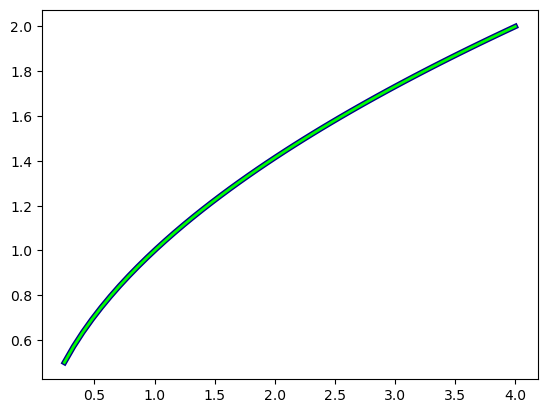

In [77]:
U = res.x

plt.plot(x, U, linewidth = 4, color = "darkblue")
plt.plot(x, x**0.5,linewidth = 2, color = "lime")
plt.show()


#### Сравнение точного и приближенного решений

In [89]:
eps = 0.0001
flag = True

for i in range (N):
    if (abs(U[i]-x[i]**0.5) > eps):
        flag = False
        
if (flag == True):
    print ("Численное решение точно до четвертого порядка")

Численное решение точно до четвертого порядка


#### Исследование зависимоти погрешности от качества сетки

In [100]:
N = 25
x = np.linspace(1/4, 4, N)
U0 = np.zeros(len(x)) + 1
R_25 = lambda U_25: glob(x, U_25)
res = scipy.optimize.root(R_25, U0)
U_25 = res.x

pogr_1 = np.zeros(N)
for i in range (N):
    pogr_1[i] = abs(U_25[i] - x[i]**0.5)
maxPogr_1 = max(pogr_1)
print ('Максимальная погрешность для сетки с 25 узлами =', maxPogr_1)


N = 50
x = np.linspace(1/4, 4, N)
U0 = np.zeros(len(x)) + 1
R_50 = lambda U_50: glob(x, U_50)
res = scipy.optimize.root(R_50, U0)
U_50 = res.x

pogr_2 = np.zeros(N)
for i in range (N):
    pogr_2[i] = abs(U_50[i] - x[i]**0.5)
maxPogr_2 = max(pogr_2)
print ('Максимальная погрешность для сетки с 50 узлами = ', maxPogr_2)

N = 100
x = np.linspace(1/4, 4, N)
U0 = np.zeros(len(x)) + 1
R_100 = lambda U_100: glob(x, U_100)
res = scipy.optimize.root(R_100, U0)
U_100 = res.x

pogr_3 = np.zeros(N)
for i in range (N):
    pogr_3[i] = abs(U_100[i] - x[i]**0.5)
maxPogr_3 = max(pogr_3)
print ('Максимальная погрешность для сетки с 100 узлами = ', maxPogr_3)

print ('Минимальная из максимальных погрешностей = ', min (maxPogr_1, maxPogr_2, maxPogr_3))

Максимальная погрешность для сетки с 25 узлами = 0.00027241593776361483
Максимальная погрешность для сетки с 50 узлами =  6.350317118719584e-05
Максимальная погрешность для сетки с 100 узлами =  1.542050459668598e-05
Минимальная из максимальных погрешностей =  1.542050459668598e-05


Проведя эксперименты для сеток размерности: $\quad N = 25,\quad N = 50,\quad N = 100\quad$ было выявлено, что при увеличении количества узлов сетки максимальная разница между точным и приближенным решением уменьшается. То есть, на больших сетках численное решение получается более точным.

#### Для базисных функций второго порядка

In [12]:
def locKv(x, U, k):
    
    h = x[k + 2] - x[k]
    R_loc = np.zeros(3)
    
    M = 3
    GaussQWeight = [5/18, 4/9, 5/18]
    GaussQPoint = [1/2 * (1 - math.sqrt(3/5)), 1/2, 1/2 * (1 + math.sqrt(3/5))]
    
    for m in range(M):
        X = GaussQPoint[m]
        phi_loc = [2 * (1 - X) * (0.5 - X), 4 * X * (1 - X), 2 * X * (X - 0.5)]
        phi_locPr = [4 * X - 3, 4 - 8 * X, 4 * X - 1]
            
        u_loc = U[k] * phi_loc[0] + U[k + 1] * phi_loc[1] + U[k + 2] * phi_loc[2]
        u_locPr = U[k] * phi_locPr[0] + U[k + 1] * phi_locPr[1] + U[k + 2] * phi_locPr[2]
            
        valueP = defineFuncP(u_loc)
        valueF = defineFuncF(u_loc)
        
        for i in range (3):
            R_loc[i] = R_loc[i] + (h * GaussQWeight[m] * (1 / (h * h) * valueP * u_locPr * phi_locPr[i] + valueF * phi_loc[i]))
    return R_loc

In [16]:
def globKv(x, U):
    N = len(x)//2
    R = np.zeros(2 * N + 1)
    for k in range(0, N):
        #print (k)
        r_loc = locKv(x, U, 2*k)
        R[2 * k:2 * k + 2 + 1] += r_loc

    R[0] = U[0] - 1/2
    R[2 * N] = R[2 * N] - 3/4
    return R

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00  5.807e-07 ... -4.428e-07  5.585e-07]
       x: [ 5.000e-01  5.362e-01 ...  1.991e+00  2.000e+00]
    nfev: 113
    fjac: [[-1.395e-02  9.922e-01 ... -2.635e-06  2.392e-05]
           [ 3.928e-02 -1.233e-01 ...  9.023e-03 -1.923e-02]
           ...
           [ 1.324e-01  2.369e-03 ... -2.138e-01 -1.426e-01]
           [-8.058e-02 -1.515e-03 ... -1.614e-01 -1.631e-01]]
       r: [-7.167e+01  1.495e+02 ...  4.848e+00 -1.138e-01]
     qtf: [ 2.267e-06 -4.642e-07 ... -2.234e-07  6.222e-09]


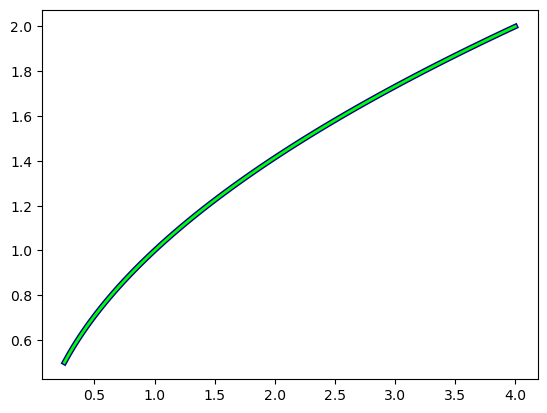

In [18]:
N = 50
x_element_bord = np.linspace(1/4, 4, N + 1)
x = np.zeros(2*N + 1)
i = 0
index = 0
for i in range (N + 1):
    x[index] = x_element_bord[i]
    index = index + 2
    
for i in range (1, 2*N + 1, 2):
    if (x[i] == 0):
        x[i] = 0.5 * (x[i-1]+x[i+1])


U0 = np.zeros(len(x)) + 1
R = lambda U: globKv(x, U)
res = scipy.optimize.root(R, U0)
res
U = res.x

print (res)

plt.plot(x, U, linewidth = 4, color = "darkblue")
plt.plot(x, x**0.5,linewidth = 2, color = "lime")
plt.show()


#### Сравнение точного и приближенного решений

In [24]:
eps = 0.000001
flag = True

for i in range (N):
    if (abs(U[i]-x[i]**0.5) > eps):
        flag = False
        
if (flag == True):
    print ("Численное решение точно до шестого порядка")

Численное решение точно до шестого порядка


Видно, что при использовании базтсных функций второго порядка численное решение находится точнее.

#### Исследование зависимоти погрешности от качества сетки

In [27]:
N = 25

x_element_bord = np.linspace(1/4, 4, N + 1)
x = np.zeros(2*N + 1)
i = 0
index = 0
for i in range (N + 1):
    x[index] = x_element_bord[i]
    index = index + 2
    
for i in range (1, 2*N + 1, 2):
    if (x[i] == 0):
        x[i] = 0.5 * (x[i-1]+x[i+1])

U0 = np.zeros(len(x)) + 1
R_25 = lambda U_25: globKv(x, U_25)
res = scipy.optimize.root(R_25, U0)
U_25 = res.x

pogr_1 = np.zeros(N)
for i in range (N):
    pogr_1[i] = abs(U_25[i] - x[i]**0.5)
maxPogr_1 = max(pogr_1)
print ('Максимальная погрешность для сетки с 25 узлами =', maxPogr_1)


N = 50

x_element_bord = np.linspace(1/4, 4, N + 1)
x = np.zeros(2*N + 1)
i = 0
index = 0
for i in range (N + 1):
    x[index] = x_element_bord[i]
    index = index + 2
    
for i in range (1, 2*N + 1, 2):
    if (x[i] == 0):
        x[i] = 0.5 * (x[i-1]+x[i+1])

U0 = np.zeros(len(x)) + 1
R_50 = lambda U_50: globKv(x, U_50)
res = scipy.optimize.root(R_50, U0)
U_50 = res.x

pogr_2 = np.zeros(N)
for i in range (N):
    pogr_2[i] = abs(U_50[i] - x[i]**0.5)
maxPogr_2 = max(pogr_2)
print ('Максимальная погрешность для сетки с 50 узлами = ', maxPogr_2)

N = 100

x_element_bord = np.linspace(1/4, 4, N + 1)
x = np.zeros(2*N + 1)
i = 0
index = 0
for i in range (N + 1):
    x[index] = x_element_bord[i]
    index = index + 2
    
for i in range (1, 2*N + 1, 2):
    if (x[i] == 0):
        x[i] = 0.5 * (x[i-1]+x[i+1])

U0 = np.zeros(len(x)) + 1
R_100 = lambda U_100: globKv(x, U_100)
res = scipy.optimize.root(R_100, U0)
U_100 = res.x

pogr_3 = np.zeros(N)
for i in range (N):
    pogr_3[i] = abs(U_100[i] - x[i]**0.5)
maxPogr_3 = max(pogr_3)
print ('Максимальная погрешность для сетки с 100 узлами = ', maxPogr_3)

print ('Минимальная из максимальных погрешностей = ', min (maxPogr_1, maxPogr_2, maxPogr_3))

Максимальная погрешность для сетки с 25 узлами = 9.72269566024142e-06
Максимальная погрешность для сетки с 50 узлами =  8.854444749628598e-07
Максимальная погрешность для сетки с 100 узлами =  7.578433669497286e-08
Минимальная из максимальных погрешностей =  7.578433669497286e-08


Проведя аналогичные эксперименты для базисных функцийвторого порядка для сеток размерности: $\quad N = 25,\quad N = 50,\quad N = 100\quad$ было также выявлено, что при увеличении количества узлов сетки максимальная разница между точным и приближенным решением уменьшается. То есть, на больших сетках численное решение получается более точным.

Также, можно заметить, что при использовании базисных функций второго порядка максимальная погрешность уменьшилась на $2 - 3$ порядка при соответсвующем увеличении сетки.

### Литература

1. Whiteley J., Finite Element Methods: A Practical Guide, 2017
2. Соловейчик, Рояк, Персова, Метод конечных элементов для решения скалярных и векторных задач, Новосибирск, 2007.